In [81]:
# It is a computer replication of if else decision making. For example
#if we need to distinguish between dolphin, hawk and beer then we have have three feature has fin, can fly and has feather
# se we can drill down the decision based on these three features
# this is called the desicion treee
# from this https://machinelearningmastery.com/classification-versus-regression-in-machine-learning/
# I have also figure out that there will be no any accuracy thing for regression. The models is examined using RSME (root mean square value)
# There will be accuracy of classification problem. accuracy


In [23]:
# decision tree on breast cancer dataset

In [41]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [42]:
cancer = datasets.load_breast_cancer() 

In [43]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [118]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [69]:
X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify = cancer.target, random_state = 42)

In [70]:
tree = DecisionTreeClassifier(random_state = 0)

In [71]:
X_train.shape

(426, 30)

In [72]:
y_train.shape

(426,)

In [73]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [80]:
# accuracy on training dataset
print("The accuracy on training dataset is: {:.2f}".format(tree.score(X_train,y_train)))
print("The accuracy on testing dataset is: {:.2f}".format(tree.score(X_test, y_test)))

The accuracy on training dataset is: 1.00
The accuracy on testing dataset is: 0.94


In [82]:
# pruning the decision tree

In [83]:
# if we dont restrict the depth of decision tree, the tree can become arbitrarily
# deep and complex 
# therefore unpruned tree are prone to overfitting and not generalizing well to new data
# max_depth limit the tree and prevent overfitting

In [92]:
tree = DecisionTreeClassifier(max_depth = 4, random_state=0)

In [93]:
tree.fit(X_train,y_train)
print("The accuracy on training dataset is: {:.3f}".format(tree.score(X_train,y_train)))
print("The accuracy on testing dataset is: {:.3f}".format(tree.score(X_test, y_test)))

The accuracy on training dataset is: 0.988
The accuracy on testing dataset is: 0.951


In [89]:
# as we can compare 
# before using max_depth the accuracy on training dataset was 1 now after limiting accuracy falls slightly 
# but the accuracy of test is high than the previous one()

In [94]:
# visualizing the decision tree

In [111]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names = ["malignant","benign"],
              feature_names = cancer.feature_names, impurity = False, filled = True)

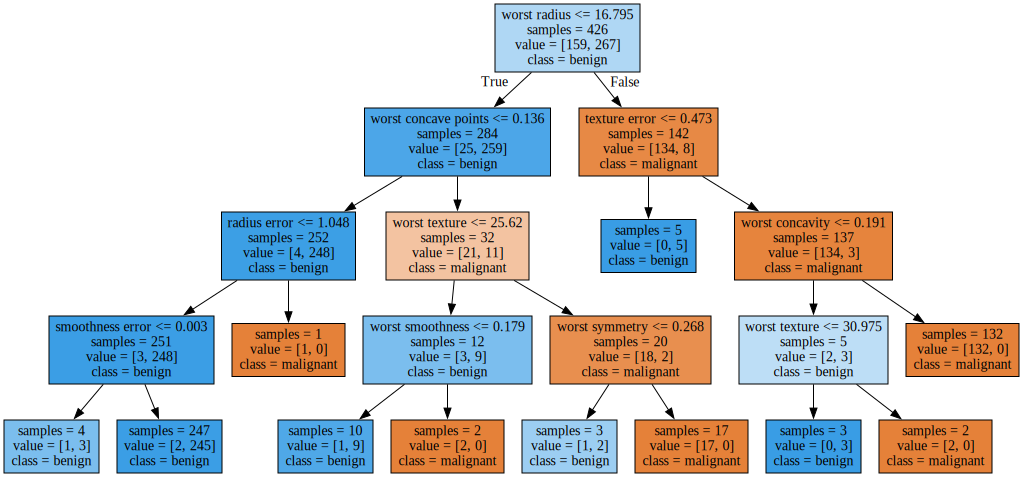

In [112]:
import graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [113]:
# trees can be overwhelming so see it in different way is featrure importance


In [114]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

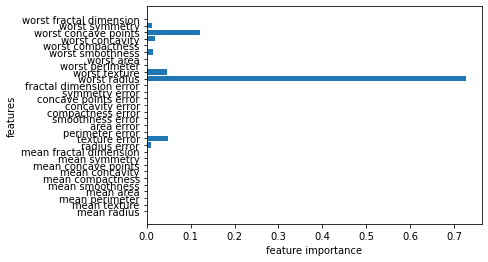

In [116]:
import matplotlib.pyplot as plt
def plot_feature_importances_cancer_model(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel('features')

plot_feature_importances_cancer_model(tree)

In [117]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [119]:
# from the graph we can say that the wrost feature is the most important feature 

In [120]:
# pros of decision tree
#1) Easy to intrepret 
#2) No Scaling and Normalization need since each feature is process seperately

# cons
# even after pruning it can overfit resulting poor generalization 

In [121]:
# Ensembles
# this means combinng ML Models to make a powerful ML Models 

In [122]:
# two popular ensemble model are random forest and gradient boosted decision tree